Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
Phi = poly.fit_transform(X)
Phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
def get_weights(X,y,l=0):
    if l > 0:
        identity = np.dot(l,np.identity(X.shape[1]))
        identity[0][0] = 0
        return np.dot(np.dot(linalg.inv(np.dot(X.T, X) + identity), X.T), y)
    return np.dot(np.dot(linalg.inv(np.dot(X.T, X)), X.T), y)

w = get_weights(Phi,y)
w_pseudo_inverse = np.dot(np.linalg.pinv(Phi), y)
print(f"w: {w}")
print(f"w_pinv: {w_pseudo_inverse}")

w: [2.2        0.45714286]
w_pinv: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

MSE: 2.042857142857143


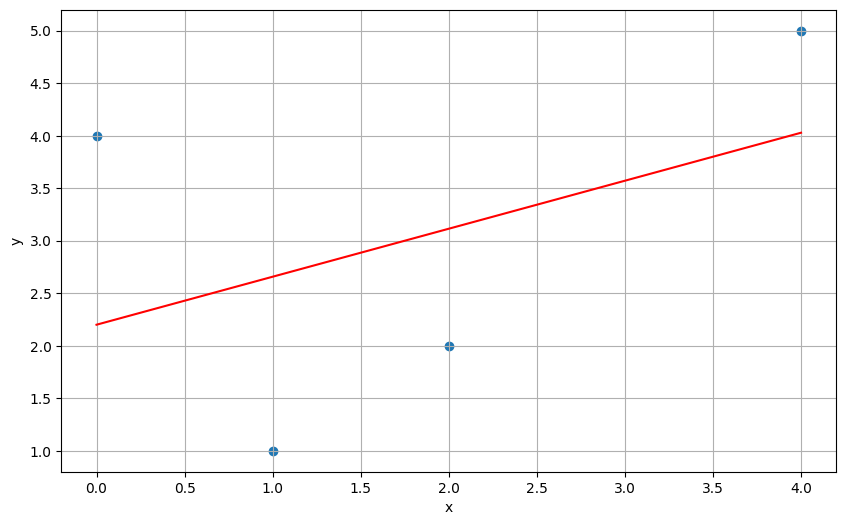

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
def h(X, w):
    return np.dot(X, w)

predicitons = h(Phi, w)

mse = mean_squared_error(y, predicitons)
print(f"MSE: {mse}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, predicitons, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
try:
    w = np.dot(linalg.inv(Phi), y)
except linalg.LinAlgError as e:
    print(e)

Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(X, y)
print(f"Intercept: {reg.intercept_}")
print(f"Coef: {reg.coef_}")
print(f"Model predictions: {reg.predict(X)}")
print(f"Previously calculated predictions: {predicitons}")

Intercept: 2.2
Coef: [0.45714286]
Model predictions: [2.2        2.65714286 3.11428571 4.02857143]
Previously calculated predictions: [2.2        2.65714286 3.11428571 4.02857143]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return np.array([np.array(f(x) + normal(0, noise)) for x in X])
    

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3 

X = make_instances(-5,5,50)
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

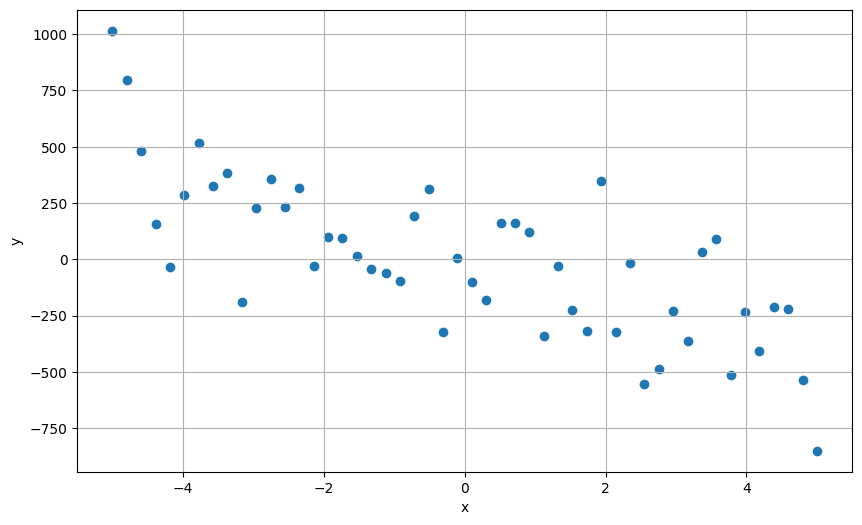

In [11]:
# Vaš kôd ovdje
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

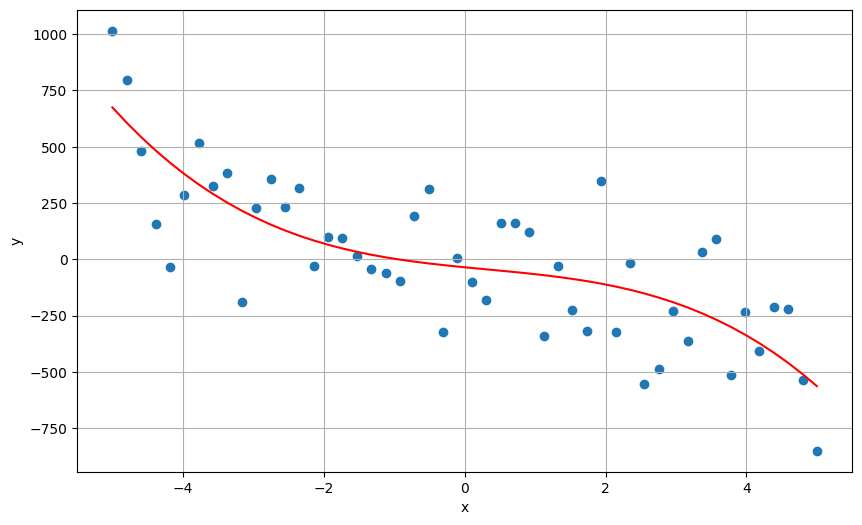

In [12]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
Phi = poly.fit_transform(X)
w = get_weights(Phi, y)
predictions = h(Phi, w)
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

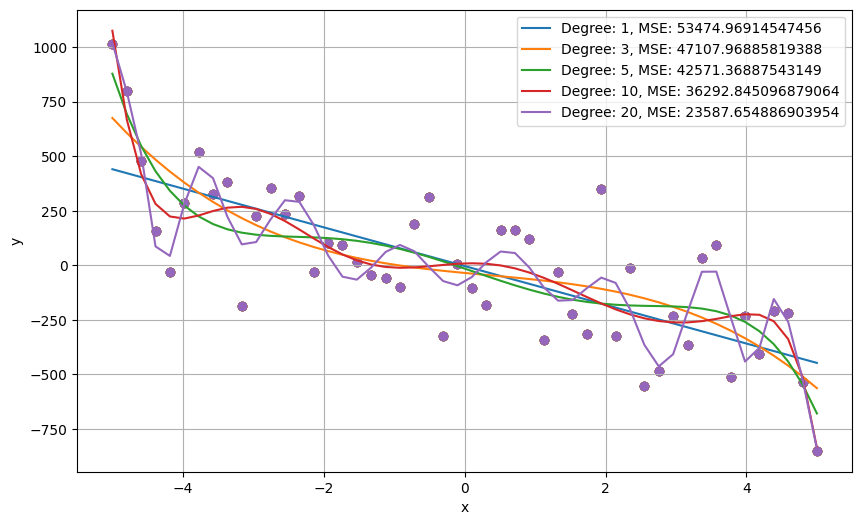

In [13]:
# Vaš kôd ovdje

degrees = [1, 3, 5, 10, 20]

plt.figure(figsize=(10, 6))

for degree in degrees:
    poly = PolynomialFeatures(degree)
    Phi = poly.fit_transform(X)
    reg = LinearRegression().fit(Phi, y)
    predictions = reg.predict(Phi)
    mse = mean_squared_error(y, predictions)


    plt.scatter(X, y)
    plt.plot(X, predictions, label=f"Degree: {degree}, MSE: {mse}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    
plt.show()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

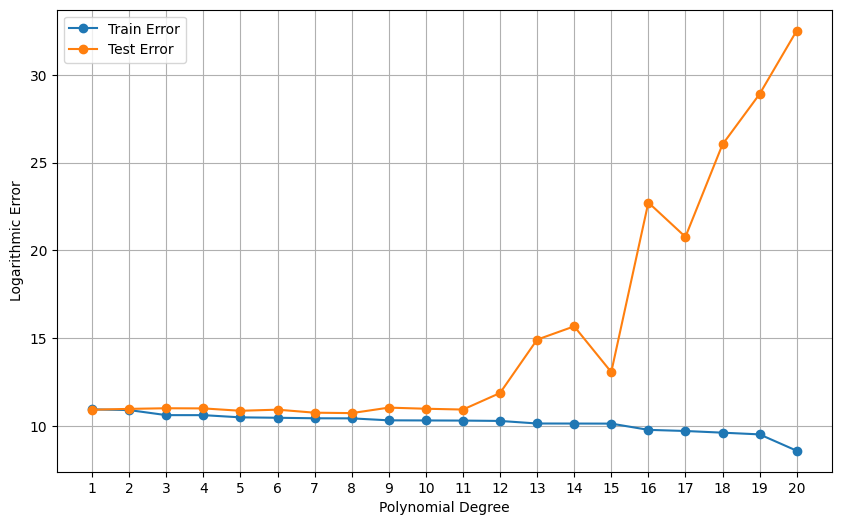

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
degrees = np.linspace(1, 20, 20, dtype=int)

train_error = []
test_error = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    Phi_train = poly.fit_transform(X_train)
    Phi_test = poly.fit_transform(X_test)
    reg = LinearRegression().fit(Phi_train, y_train)
    predictions_train = reg.predict(Phi_train)
    predictions_test = reg.predict(Phi_test)
    train_error.append(np.log(mean_squared_error(y_train, predictions_train)))
    test_error.append(np.log(mean_squared_error(y_test, predictions_test)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_error, label="Train Error", marker='o')
plt.plot(degrees, test_error, label="Test Error", marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithmic Error')
plt.legend()
plt.grid()
plt.xticks(np.linspace(1, 20, 20, dtype=int))
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

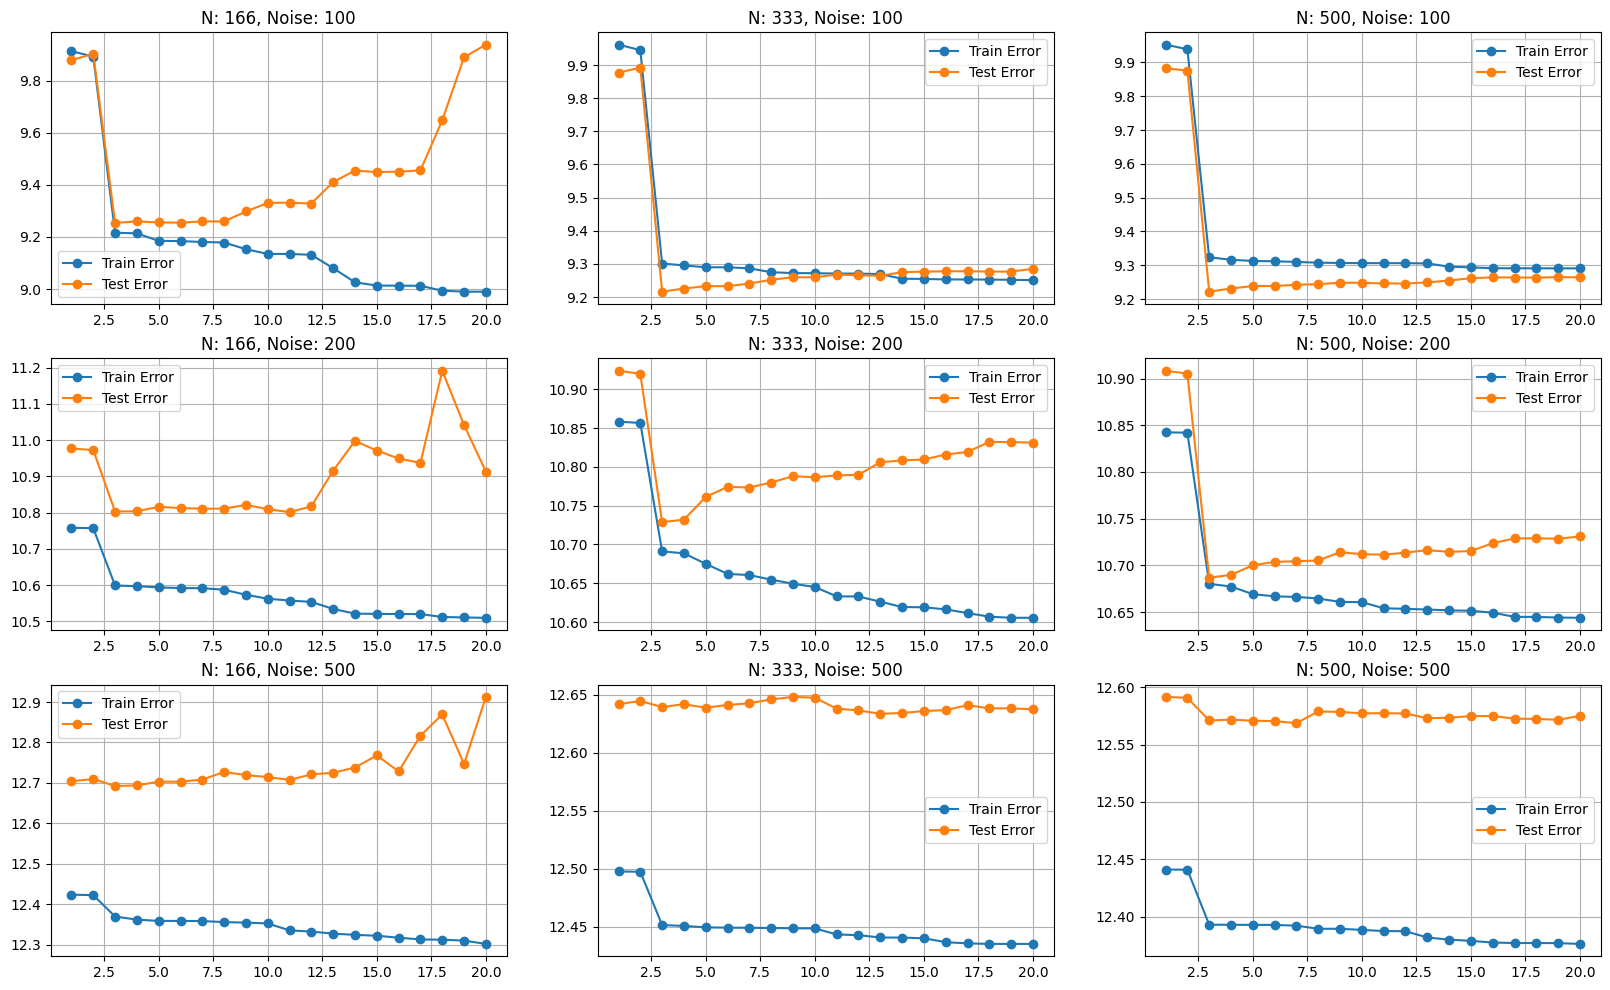

In [15]:
# Vaš kôd ovdje
N = 500
N_list = [N//3, N*2//3, N];
noise_list = [100, 200, 500];

X = make_instances(-5,5,1000)

X_train, X_test = train_test_split(X, test_size=0.5)

f, axarr = plt.subplots(3, 3)
f.subplots_adjust(hspace=0.2, wspace=0.2)
f.set_figwidth(20)
f.set_figheight(12)

def f(x):
    return 5 + x - 2*x**2 - 5*x**3

for noise in noise_list:
    y_train = make_labels(X_train, f, noise)
    y_test = make_labels(X_test, f, noise)
    
    for n_examples in N_list:
        X_train_N = X_train[:n_examples]
        X_test_N = X_test[:n_examples]
        y_train_N = y_train[:n_examples]
        y_test_N = y_test[:n_examples]
        
        train_error = []
        test_error = []

        for degree in degrees:
            poly = PolynomialFeatures(degree)
            Phi_train = poly.fit_transform(X_train_N)
            Phi_test = poly.fit_transform(X_test_N)
            reg = LinearRegression().fit(Phi_train, y_train_N)
            predictions_train = reg.predict(Phi_train)
            predictions_test = reg.predict(Phi_test)

            train_error.append(np.log(mean_squared_error(y_train_N, predictions_train)))
            test_error.append(np.log(mean_squared_error(y_test_N, predictions_test)))
            
        i = noise_list.index(noise)
        j = N_list.index(n_examples)
            
        axarr[i, j].plot(degrees, train_error, label="Train Error", marker='o')
        axarr[i, j].plot(degrees, test_error, label="Test Error", marker='o')
        axarr[i, j].legend()
        axarr[i, j].set_title(f"N: {n_examples}, Noise: {noise}")
        axarr[i, j].grid()


plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
Phi = poly.fit_transform(X)

w_0 = get_weights(Phi, y)
w_1 = get_weights(Phi, y, 1)
w_10 = get_weights(Phi, y, 10)

print(f"w_0: {w_0}")
print(f"w_1: {w_1}")
print(f"w_10: {w_10}")

w_0: [ 4.         -5.91666667  3.375      -0.45833333]
w_1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
w_10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3)
Phi = poly.fit_transform(X)

ridge_0 = Ridge(alpha=0)
ridge_1 = Ridge(alpha=1)
ridge_10 = Ridge(alpha=10)

ridge_0.fit(Phi, y)
ridge_1.fit(Phi, y)
ridge_10.fit(Phi, y)

print(f"w_0: coef = {ridge_0.coef_}, intercept = {ridge_0.intercept_}")
print(f"w_1: coef = {ridge_1.coef_}, intercept = {ridge_1.intercept_}")
print(f"w_10: coef = {ridge_10.coef_}, intercept = {ridge_10.intercept_}")


w_0: coef = [ 0.         -5.91666667  3.375      -0.45833333], intercept = 4.000000000000028
w_1: coef = [ 0.         -0.69079365 -0.2831746   0.1445805 ], intercept = 3.0569614512471652
w_10: coef = [ 0.         -0.15897295 -0.13423067  0.0815601 ], intercept = 2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

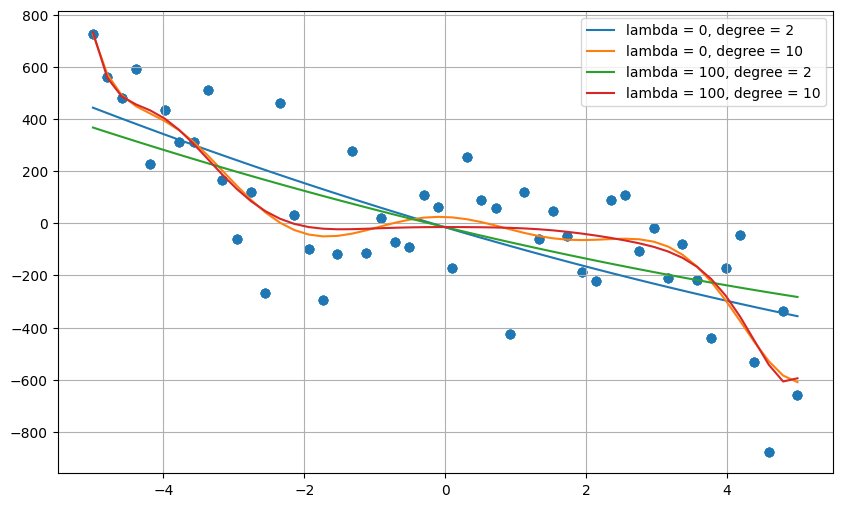

In [18]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

N = 50
X = make_instances(-5, 5, N)
y = make_labels(X, f, 200)

lambda_values = [0, 100]
degree_values = [2, 10]

plt.figure(figsize=(10, 6))

for l in lambda_values:
    for degree in degree_values:
        poly = PolynomialFeatures(degree)
        Phi = poly.fit_transform(X)
        ridge = Ridge(alpha=l)
        ridge.fit(Phi, y)
        predicitons = ridge.predict(Phi)
        plt.scatter(X, y, c = 'tab:blue')
        plt.plot(X, predicitons, label=f"lambda = {l}, degree = {degree}")
        plt.legend()

plt.grid()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


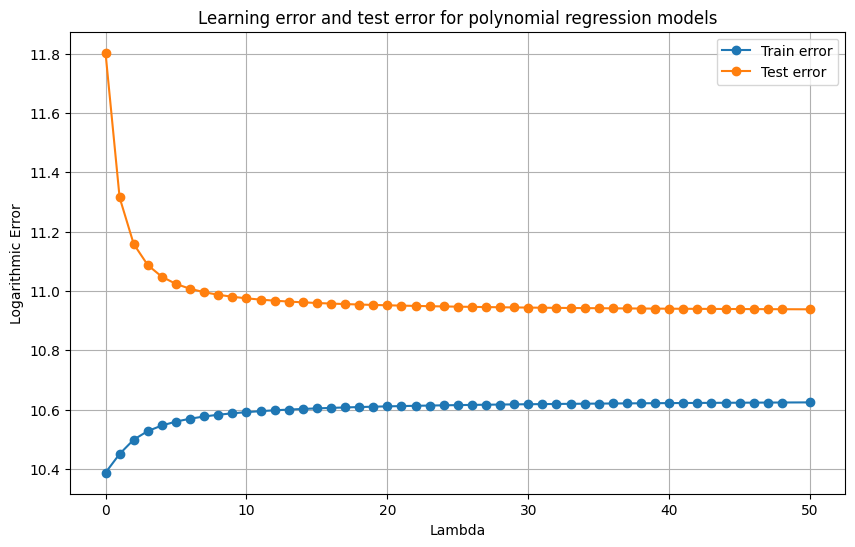

In [19]:
# Vaš kôd ovdje
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

lambda_values = np.linspace(0, 50, 50, dtype=int)  

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
train_error = []
test_error = []


for lambda_ in lambda_values:

    poly = PolynomialFeatures(degree=10)
    Phi_train = poly.fit_transform(X_train)
    Phi_test = poly.fit_transform(X_test.reshape(-1, 1))

    ridge = Ridge(alpha=lambda_)
    ridge.fit(Phi_train, y_train)
    
    predicitons_train = ridge.predict(Phi_train)
    train_error.append(np.log(mean_squared_error(y_train, predicitons_train)))

    predicitons_test = ridge.predict(Phi_test)
    test_error.append(np.log(mean_squared_error(y_test, predicitons_test)))
    
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_error, label='Train error', marker='o')
plt.plot(lambda_values, test_error, label='Test error', marker='o')
plt.xlabel('Lambda')
plt.ylabel('Logarithmic Error')
plt.title('Learning error and test error for polynomial regression models')
plt.legend()
plt.grid()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

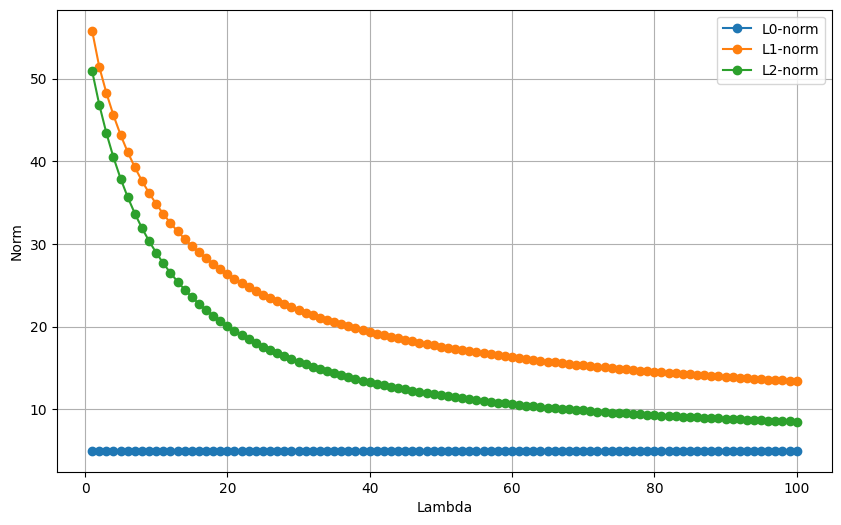

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
import math
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

lambda_values = np.linspace(1, 100, 100, dtype=int)

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

l0_norm = []
l1_norm = []
l2_norm = []


for lambda_ in lambda_values:
    poly = PolynomialFeatures(degree=5)
    Phi_train = poly.fit_transform(X_train)
    ridge = Ridge(alpha=lambda_)
    ridge.fit(Phi_train, y_train)
    l0_norm.append(nonzeroes(ridge.coef_[0]))
    l1_norm.append(linalg.norm(ridge.coef_[0], 1))
    l2_norm.append(linalg.norm(ridge.coef_[0], 2))

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, l0_norm, label='L0-norm', marker='o')
plt.plot(lambda_values, l1_norm, label='L1-norm', marker='o')
plt.plot(lambda_values, l2_norm, label='L2-norm', marker='o')
plt.xlabel('Lambda')
plt.ylabel('Norm')
plt.legend()
plt.grid()
plt.show()



### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

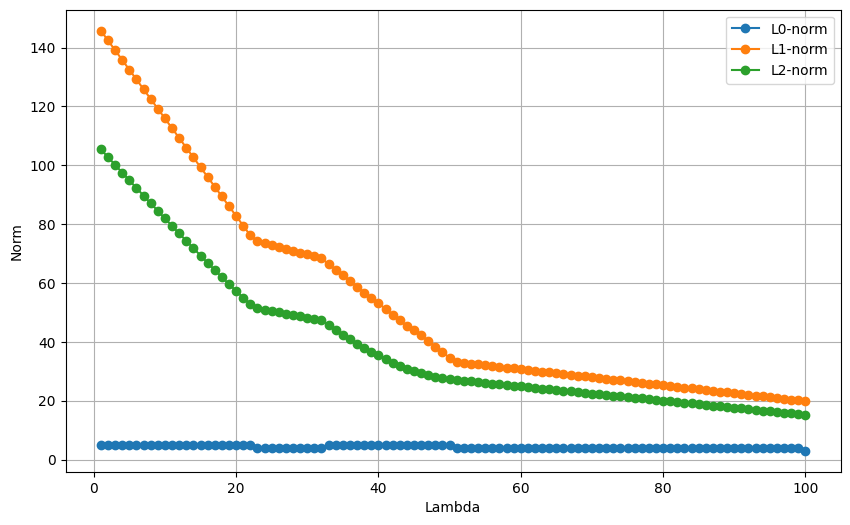

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

lambda_values = np.linspace(1, 100, 100, dtype=int)

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

l0_norm = []
l1_norm = []
l2_norm = []


for lambda_ in lambda_values:
    poly = PolynomialFeatures(degree=5)
    Phi_train = poly.fit_transform(X_train)
    lasso = Lasso(alpha=lambda_)
    lasso.fit(Phi_train, y_train)
    
    l0_norm.append(nonzeroes(lasso.coef_[1:]))
    l1_norm.append(linalg.norm(lasso.coef_[1:], 1))
    l2_norm.append(linalg.norm(lasso.coef_[1:], 2))

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, l0_norm, label='L0-norm', marker='o')
plt.plot(lambda_values, l1_norm, label='L1-norm', marker='o')
plt.plot(lambda_values, l2_norm, label='L2-norm', marker='o')
plt.xlabel('Lambda')
plt.ylabel('Norm')
plt.legend()
plt.grid()
plt.show()



### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

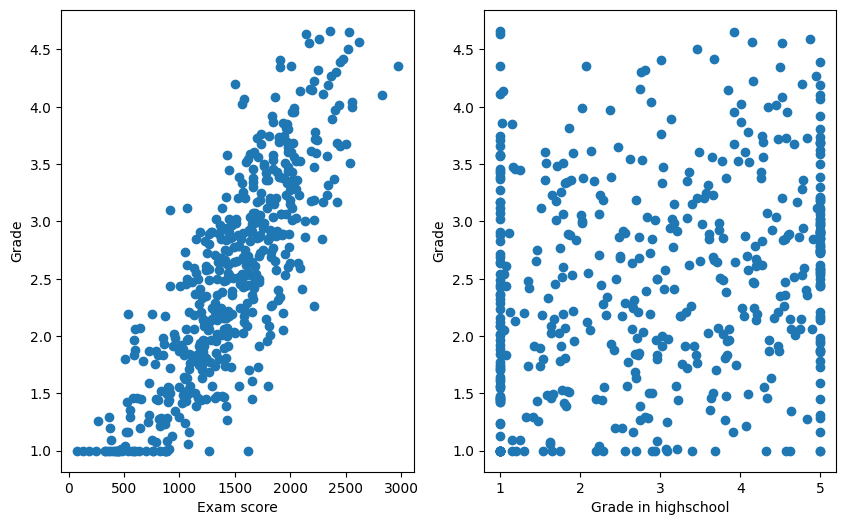

In [24]:
# Vaš kôd ovdje
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(exam_score, grades_y)
plt.xlabel('Exam score')
plt.ylabel('Grade')
plt.subplot(1, 2, 2)
plt.scatter(grade_in_highschool, grades_y)
plt.xlabel('Grade in highschool')
plt.ylabel('Grade')
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X, grades_y)
print(f"Ridge: {ridge.coef_}")

Ridge: [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed, grades_y_fixed)
print(f"Ridge: {ridge.coef_}")

Ridge: [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.append(grades_X_fixed, grades_X_fixed[:, 1].reshape(-1, 1), axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print(f"Ridge: {ridge.coef_}")


Ridge: [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje
ridge_001_weights = []
ridge_1000_weights = []

for i in range(10):
    X = grades_X_fixed_colinear[np.random.choice(500, 250, replace=False), :]
    y = grades_y_fixed[np.random.choice(500, 250, replace=False), :]
    ridge_001 = Ridge(alpha=0.01)
    ridge_001.fit(X, y)
    ridge_001_weights.append(ridge_001.coef_)
    print(f"Ridge (lambda=0.01) weights: {ridge_001.coef_})")
    
    ridge_1000 = Ridge(alpha=1000)
    ridge_1000.fit(X, y)
    ridge_1000_weights.append(ridge_1000.coef_)
    print(f"Ridge (lambda=1000) weights: {ridge_1000.coef_})")
    

for i in range(3):
    print(f"Stddev for w{i}, lambda = 0.01: {np.std([ridge_001_weights[j][0][i] for j in range(10)])}")
    print(f"Stddev for w{i}, lambda = 1000: {np.std([ridge_1000_weights[j][0][i] for j in range(10)])}")




Ridge (lambda=0.01) weights: [[0.04142324 0.06846213 0.06846213]])
Ridge (lambda=1000) weights: [[0.00794419 0.02222916 0.02222916]])
Ridge (lambda=0.01) weights: [[-0.11748495  0.02278054  0.02278054]])
Ridge (lambda=1000) weights: [[-0.02264314  0.00535609  0.00535609]])
Ridge (lambda=0.01) weights: [[-0.04461037 -0.03011384 -0.03011384]])
Ridge (lambda=1000) weights: [[-0.01019791 -0.01065458 -0.01065458]])
Ridge (lambda=0.01) weights: [[ 0.09163807 -0.07379048 -0.07379048]])
Ridge (lambda=1000) weights: [[ 0.0162303  -0.02269061 -0.02269061]])
Ridge (lambda=0.01) weights: [[ 0.09380619 -0.04445912 -0.04445912]])
Ridge (lambda=1000) weights: [[ 0.01639144 -0.01259165 -0.01259165]])
Ridge (lambda=0.01) weights: [[ 0.02491446 -0.02030457 -0.02030457]])
Ridge (lambda=1000) weights: [[ 0.00476277 -0.0068336  -0.0068336 ]])
Ridge (lambda=0.01) weights: [[ 0.00021014 -0.01359296 -0.01359296]])
Ridge (lambda=1000) weights: [[-0.0002875  -0.00454176 -0.00454176]])
Ridge (lambda=0.01) weight

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.